# Project Details
Project Category: Classification

Skills: EDA, Logistic Regression, Feature Engineering

Tools: Python, scikit-learn, Seaborn

Description:
Analyze employee data to predict who is likely to leave the company. Incorporate KPIs like satisfaction level, salary, department, etc.

# Project Summary
Predict whether an employee will leave the company based on features like satisfaction level, department, salary, working hours, etc.

I'm using IBM dataset for this project.

## Step 1 : Load and Explore the dataset

In [1]:
import pandas as pd

EAP_df = pd.read_csv('HR Employee Attrition dataset.csv')
print(EAP_df.head())
print(EAP_df.info())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

### Inferences
1. Attrition is the target column.
2. None of the columns have null values which eliminates the step of dealing with null values.

## Step 2 : Exploratory Data Analysis

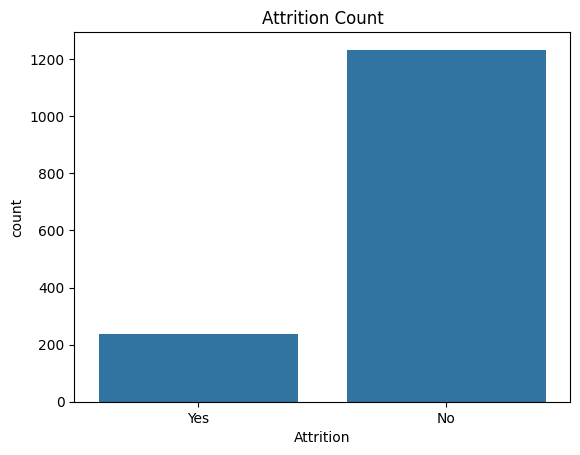

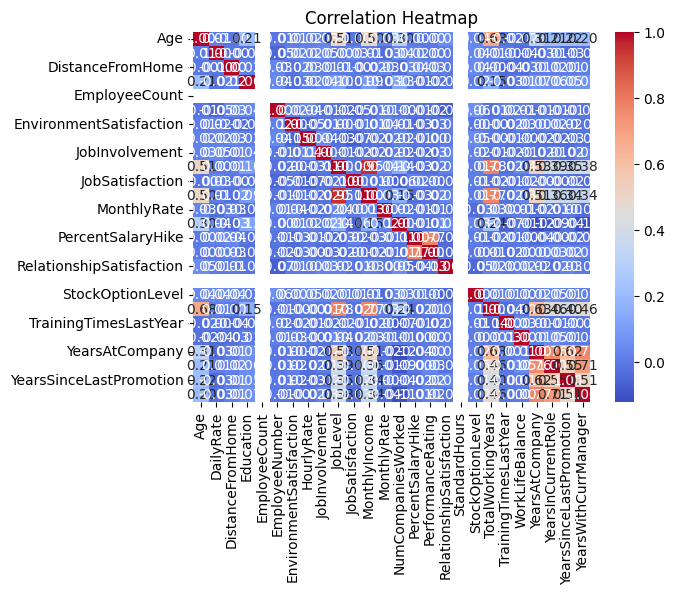

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for attrition
sns.countplot(x='Attrition', data=EAP_df)
plt.title("Attrition Count")
plt.show()

# Correlation heatmap (for numerical features)
corr = EAP_df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [3]:
EAP_df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

## Inferences 
1. Can see from the Attrition Count graph that the 2 classes are imbalanced (For No: 1233 and for Yes: 237) Which can result to a biased model.
2. Easiest solution is to use class_weight='balanced' while fit the Logisitc Regression model as in Step 4

## Step 3: Data Pre-processing & Feature Engineering 
For our experiement now I am using only 5 features as input ()

In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Attrition' to binary
EAP_df['Attrition'] = EAP_df['Attrition'].map({'Yes': 1, 'No': 0})

# Encode categorical features
cat_cols = EAP_df.select_dtypes(include='object').columns
EAP_df[cat_cols] = EAP_df[cat_cols].apply(LabelEncoder().fit_transform)

# Split features and label
#X = EAP_df.drop(['Attrition', 'EmployeeNumber'], axis=1)
feature_names=['JobSatisfaction','MonthlyIncome','Age','YearsAtCompany','DistanceFromHome']
X = EAP_df[feature_names]
y = EAP_df['Attrition']


In [5]:
#After converting the Attrition from category to binary(numerical)
EAP_df.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

### Oversampling using SMOTE
As we can see that our Attrition column is imbalanced in previous step, let's do oversampling using SMOTE technique.

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class balance
from collections import Counter
print("After SMOTE:", Counter(y_resampled))


After SMOTE: Counter({1: 1233, 0: 1233})


## Step 4: Train a logistic Regression model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pickle

#Now use the resampled(SMOTE) X and y for training the model
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save correct model object
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(model, f)

[[169  81]
 [ 69 175]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       250
           1       0.68      0.72      0.70       244

    accuracy                           0.70       494
   macro avg       0.70      0.70      0.70       494
weighted avg       0.70      0.70      0.70       494



## Step 5: Explain model predictions using SHAP

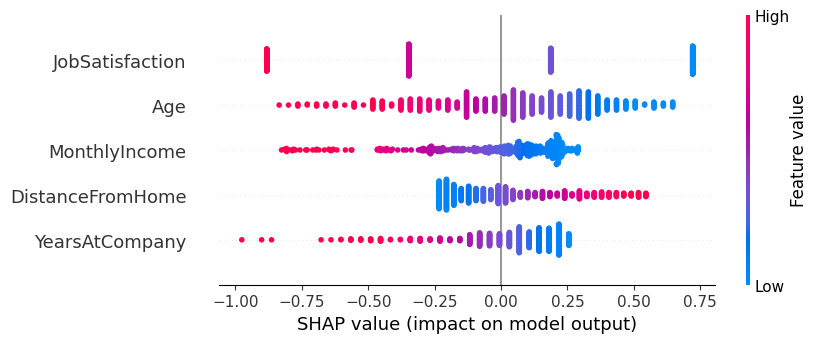

In [8]:
import shap

explainer = shap.Explainer(model, X_train, feature_names=X.columns)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)


## Step 6: Create a pickle file (logistic_model.pkl) loading the model 

In [9]:
code = """
# Your Streamlit code here...
"""
with open("app.py", "w") as f:
    f.write(code)


In [10]:
import pickle  # or use joblib if saved with that
import pandas as pd

with open("logistic_model.pkl", "rb") as file:
    model = pickle.load(file)